In [83]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.oauth2 import service_account
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
# Path to your service account JSON file
credentials = service_account.Credentials.from_service_account_file(
    "C:/Users/tanju/Desktop/possible-helix-452922-d1-820af3c2c7c5.json"
)

project_id = "possible-helix-452922-d1"
engine = create_engine(
    f"bigquery://{project_id}",
    credentials_path="C:/Users/tanju/Desktop/possible-helix-452922-d1-820af3c2c7c5.json"
)


C:\Users\tanju\AppData\Local\Temp\ipykernel_9784\286740450.py:7: SADeprecationWarning: The dbapi() classmethod on dialect classes has been renamed to import_dbapi().  Implement an import_dbapi() classmethod directly on class <class 'pybigquery.sqlalchemy_bigquery.BigQueryDialect'> to remove this warning; the old .dbapi() classmethod may be maintained for backwards compatibility.
  engine = create_engine(


In [33]:
query_1 = """
SELECT *
FROM `possible-helix-452922-d1.dbt_tdereli.bike_data_prepped`
LIMIT 10000
"""


df = pd.read_sql(query_1, engine)

In [34]:
query_2 = """
SELECT *
FROM `possible-helix-452922-d1.dbt_tdereli.taxi_data_prepped`
LIMIT 10000
"""



df_2 = pd.read_sql(query_2, engine)

In [35]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan,trip_duration_minutes,trip_duration_minutes_exact
0,147,2016-03-21 14:53:40,2016-03-21 14:56:07,529,W 42 St & 8 Ave,40.757570,-73.990985,3240,NYCBS Depot BAL - DYR,0.000000,0.000000,22747,Subscriber,1991,male,,3,2.4500
1,4222,2017-09-16 12:47:44,2017-09-16 13:58:07,514,12 Ave & W 40 St,40.760875,-74.002777,3480,Washington Street (Don't Use),0.000000,0.000000,25904,Customer,1956,male,,71,70.3667
2,259,2016-03-09 18:47:16,2016-03-09 18:51:36,447,8 Ave & W 52 St,40.763707,-73.985162,3240,NYCBS Depot BAL - DYR,0.000000,0.000000,19261,Subscriber,1967,male,,4,4.3167
3,151,2015-11-05 10:06:12,2015-11-05 10:08:43,311,Norfolk St & Broome St,40.717227,-73.988021,3019,NYCBS Depot - DEL,40.716633,-73.981933,15091,Subscriber,1993,female,,2,2.5167
4,271442,2015-12-18 18:46:06,2015-12-21 22:10:08,519,Pershing Square North,40.751873,-73.977706,3019,NYCBS Depot - DEL,40.716633,-73.981933,20773,Subscriber,1990,male,,4524,4524.0333


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   tripduration                 10000 non-null  int64         
 1   starttime                    10000 non-null  datetime64[ns]
 2   stoptime                     10000 non-null  datetime64[ns]
 3   start_station_id             10000 non-null  int64         
 4   start_station_name           10000 non-null  object        
 5   start_station_latitude       10000 non-null  float64       
 6   start_station_longitude      10000 non-null  float64       
 7   end_station_id               10000 non-null  int64         
 8   end_station_name             10000 non-null  object        
 9   end_station_latitude         10000 non-null  float64       
 10  end_station_longitude        10000 non-null  float64       
 11  bikeid                       10000 non-nul

In [37]:
df['bikeid'].duplicated().value_counts()

bikeid
False    7022
True     2978
Name: count, dtype: int64

In [38]:
df_new = df.drop_duplicates(subset='bikeid')

In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7022 entries, 0 to 9994
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   tripduration                 7022 non-null   int64         
 1   starttime                    7022 non-null   datetime64[ns]
 2   stoptime                     7022 non-null   datetime64[ns]
 3   start_station_id             7022 non-null   int64         
 4   start_station_name           7022 non-null   object        
 5   start_station_latitude       7022 non-null   float64       
 6   start_station_longitude      7022 non-null   float64       
 7   end_station_id               7022 non-null   int64         
 8   end_station_name             7022 non-null   object        
 9   end_station_latitude         7022 non-null   float64       
 10  end_station_longitude        7022 non-null   float64       
 11  bikeid                       7022 non-null   int

In [40]:
df_new.describe()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,trip_duration_minutes,trip_duration_minutes_exact
count,7022.000000,7022,7022,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000
mean,892.572059,2016-05-11 01:02:23.616967424,2016-05-11 01:17:16.635392768,1022.583167,40.732145,-73.989848,746.539163,40.707753,-73.960628,22053.981914,1976.916548,14.890914,14.876201
min,64.000000,2013-07-01 07:52:10,2013-07-01 08:04:35,72.000000,40.661063,-74.017134,195.000000,0.000000,-74.017134,14529.000000,1885.000000,1.000000,1.066700
25%,390.000000,2015-03-30 09:28:45,2015-03-30 09:40:00,327.000000,40.714979,-74.002472,363.000000,40.708347,-74.010434,17588.750000,1969.000000,7.000000,6.500000
50%,652.000000,2016-07-06 08:32:45,2016-07-06 08:44:00,449.000000,40.732241,-73.990373,403.000000,40.725029,-73.990697,20778.500000,1979.000000,11.000000,10.866700
75%,1077.750000,2017-09-18 10:10:55.249999872,2017-09-18 10:16:44.249999872,534.000000,40.754666,-73.980144,520.000000,40.759923,-73.976485,26407.750000,1986.000000,18.000000,17.962525
max,271442.000000,2018-05-31 23:46:52.086000,2018-06-01 00:14:22.063000,3680.000000,40.807832,-73.918330,3663.000000,40.762814,0.000000,33655.000000,2000.000000,4524.000000,4524.033300
std,3375.864685,NaN,NaN,1190.097104,0.027474,0.015959,990.978763,0.842084,1.529271,5321.516087,11.850665,56.265906,56.264411


In [41]:
df_new.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan,trip_duration_minutes,trip_duration_minutes_exact
0,147,2016-03-21 14:53:40,2016-03-21 14:56:07,529,W 42 St & 8 Ave,40.757570,-73.990985,3240,NYCBS Depot BAL - DYR,0.000000,0.000000,22747,Subscriber,1991,male,,3,2.4500
1,4222,2017-09-16 12:47:44,2017-09-16 13:58:07,514,12 Ave & W 40 St,40.760875,-74.002777,3480,Washington Street (Don't Use),0.000000,0.000000,25904,Customer,1956,male,,71,70.3667
2,259,2016-03-09 18:47:16,2016-03-09 18:51:36,447,8 Ave & W 52 St,40.763707,-73.985162,3240,NYCBS Depot BAL - DYR,0.000000,0.000000,19261,Subscriber,1967,male,,4,4.3167
3,151,2015-11-05 10:06:12,2015-11-05 10:08:43,311,Norfolk St & Broome St,40.717227,-73.988021,3019,NYCBS Depot - DEL,40.716633,-73.981933,15091,Subscriber,1993,female,,2,2.5167
4,271442,2015-12-18 18:46:06,2015-12-21 22:10:08,519,Pershing Square North,40.751873,-73.977706,3019,NYCBS Depot - DEL,40.716633,-73.981933,20773,Subscriber,1990,male,,4524,4524.0333


In [42]:
df_new.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender', 'customer_plan', 'trip_duration_minutes',
       'trip_duration_minutes_exact'],
      dtype='object')

In [12]:
import plotly.graph_objects as go

# Line traces
lines = []
for _, row in df.iterrows():
    lines.append(
        go.Scattermapbox(
            mode="lines",
            lon=[row['start_station_longitude'], row['end_station_longitude']],
            lat=[row['start_station_latitude'], row['end_station_latitude']],
            line=dict(width=1, color='blue'),
            showlegend=False
        )
    )

# Show bike IDs directly on the map at start station
bikeid_labels = go.Scattermapbox(
    mode="text",
    lon=df_new['start_station_longitude'],
    lat=df_new['start_station_latitude'],
    text=df_new['bikeid'].astype(str),  # Make sure it's a string
    textposition="top right",
    name="Bike IDs",
    showlegend=False
)

# Optional: start and end markers
start_points = go.Scattermapbox(
    mode="markers",
    lon=df_new['start_station_longitude'],
    lat=df_new['start_station_latitude'],
    marker=dict(size=5, color='green'),
    name='Start Stations'
)

end_points = go.Scattermapbox(
    mode="markers",
    lon=df_new['end_station_longitude'],
    lat=df_new['end_station_latitude'],
    marker=dict(size=5, color='red'),
    name='End Stations'
)

# Final figure
fig = go.Figure(data=lines + [start_points, end_points, bikeid_labels])
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=12,
    mapbox_center={
        "lat": df_new['start_station_latitude'].mean(),
        "lon": df_new['start_station_longitude'].mean()
    },
    height=700,
    showlegend=True
)

fig.show()


C:\Users\tanju\AppData\Local\Temp\ipykernel_17624\2268066535.py:7: DeprecationWarning: *scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  go.Scattermapbox(
C:\Users\tanju\AppData\Local\Temp\ipykernel_17624\2268066535.py:17: DeprecationWarning: *scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  bikeid_labels = go.Scattermapbox(
C:\Users\tanju\AppData\Local\Temp\ipykernel_17624\2268066535.py:28: DeprecationWarning: *scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  start_points = go.Scattermapbox(
C:\Users\tanju\AppData\Local\Temp\ipykernel_17624\2268066535.py:36: DeprecationWarning: *scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  end_points = go.Scattermapbox(


In [12]:
df_new['tripduration_minutes'] = df['tripduration']/60

C:\Users\tanju\AppData\Local\Temp\ipykernel_21636\338554674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['tripduration_minutes'] = df['tripduration']/60


In [43]:
df_new['starttime'].min()

Timestamp('2013-07-01 07:52:10')

In [44]:
df_new['starttime'].max()

Timestamp('2018-05-31 23:46:52.086000')

In [45]:
df_new['birth_year'].min()

1885

In [46]:
df_new['birth_year'].isnull().sum()

0

In [47]:
df_new['birth_year'].unique()

array([1991, 1956, 1967, 1993, 1990, 1985, 1992, 1988, 1984, 1972, 1969,
       1963, 1974, 1981, 1979, 1996, 1959, 1965, 1976, 1975, 1957, 1952,
       1960, 1966, 1968, 1971, 1973, 1983, 1986, 1987, 1982, 1994, 1962,
       1970, 1995, 1989, 1980, 1954, 1958, 1953, 1961, 1964, 1978, 1998,
       1949, 1951, 1955, 1942, 1945, 1977, 1946, 1947, 1948, 1999, 1950,
       1885, 1997, 1940, 1941, 1938, 1944, 1920, 2000, 1943, 1935, 1939,
       1933], dtype=int64)

In [48]:
df_new[df_new['birth_year'] == 1885]

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan,trip_duration_minutes,trip_duration_minutes_exact
842,639,2016-04-24 10:03:09,2016-04-24 10:13:49,305,E 58 St & 3 Ave,40.760958,-73.967245,520,W 52 St & 5 Ave,40.759923,-73.976485,21992,Subscriber,1885,unknown,,10,10.6500
1390,753,2015-07-12 10:38:27,2015-07-12 10:51:01,455,1 Ave & E 44 St,40.750020,-73.969053,520,W 52 St & 5 Ave,40.759923,-73.976485,22107,Subscriber,1885,unknown,,13,12.5500
1391,637,2016-08-22 08:39:08,2016-08-22 08:49:45,455,1 Ave & E 44 St,40.750020,-73.969053,520,W 52 St & 5 Ave,40.759923,-73.976485,22358,Subscriber,1885,unknown,,10,10.6167
1396,669,2016-08-14 09:27:23,2016-08-14 09:38:33,455,1 Ave & E 44 St,40.750020,-73.969053,520,W 52 St & 5 Ave,40.759923,-73.976485,25045,Subscriber,1885,unknown,,11,11.1500


In [49]:
df_new['year'] = df_new['starttime'].dt.year

C:\Users\tanju\AppData\Local\Temp\ipykernel_9784\2439944409.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
df_new.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan,trip_duration_minutes,trip_duration_minutes_exact,year
0,147,2016-03-21 14:53:40,2016-03-21 14:56:07,529,W 42 St & 8 Ave,40.757570,-73.990985,3240,NYCBS Depot BAL - DYR,0.000000,0.000000,22747,Subscriber,1991,male,,3,2.4500,2016
1,4222,2017-09-16 12:47:44,2017-09-16 13:58:07,514,12 Ave & W 40 St,40.760875,-74.002777,3480,Washington Street (Don't Use),0.000000,0.000000,25904,Customer,1956,male,,71,70.3667,2017
2,259,2016-03-09 18:47:16,2016-03-09 18:51:36,447,8 Ave & W 52 St,40.763707,-73.985162,3240,NYCBS Depot BAL - DYR,0.000000,0.000000,19261,Subscriber,1967,male,,4,4.3167,2016
3,151,2015-11-05 10:06:12,2015-11-05 10:08:43,311,Norfolk St & Broome St,40.717227,-73.988021,3019,NYCBS Depot - DEL,40.716633,-73.981933,15091,Subscriber,1993,female,,2,2.5167,2015
4,271442,2015-12-18 18:46:06,2015-12-21 22:10:08,519,Pershing Square North,40.751873,-73.977706,3019,NYCBS Depot - DEL,40.716633,-73.981933,20773,Subscriber,1990,male,,4524,4524.0333,2015


In [51]:
df_agg = df_new.groupby('year')['trip_duration_minutes_exact'].sum().reset_index()
df_agg

,year,trip_duration_minutes_exact
0,2013,9524.3848
1,2014,13417.2001
2,2015,20220.0000
3,2016,17145.3150
4,2017,29175.7836
5,2018,14978.0001


In [52]:
fig = px.bar(data_frame=df_agg
              , x='year'
              , y='trip_duration_minutes_exact'
              , height=500
              , title="Year vs trip duration"
              #,color='birth_year'
              )
fig.show()

In [53]:
df_agg_2 = df_new.groupby('birth_year')['trip_duration_minutes_exact'].sum().reset_index()
df_agg_2

,birth_year,trip_duration_minutes_exact
0,1885,44.9667
1,1920,12.4333
2,1933,31.2500
3,1935,36.5333
4,1938,19.2333
...,...,...
62,1996,257.9167
63,1997,184.9335
64,1998,155.8833
65,1999,297.9002


In [54]:
fig = px.bar(data_frame=df_agg_2
              , x='birth_year'
              , y='trip_duration_minutes_exact'
              , height=500
              , title="Birth year vs trip duration"
              #,color='birth_year'
              )
fig.show()

In [55]:
df_2.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month,trip_duration_seconds,trip_duration_minutes_exact
0,2,2022-03-18 13:00:31+00:00,2022-03-18 13:00:39+00:00,1.0,0.0,1.0,N,1,0.0,0.0,...,0.0,0.0,0.0,0.0,193,264,2022,3,8,0.1333
1,2,2022-03-31 16:23:23+00:00,2022-03-31 16:23:34+00:00,1.0,0.0,1.0,N,1,0.0,0.0,...,0.0,0.0,0.0,0.0,193,193,2022,3,11,0.1833
2,2,2022-03-08 17:49:53+00:00,2022-03-08 17:50:29+00:00,1.0,0.0,1.0,N,1,0.0,0.0,...,0.0,0.0,0.0,0.0,193,193,2022,3,36,0.6000
3,2,2022-03-15 19:58:13+00:00,2022-03-15 19:58:31+00:00,1.0,0.0,1.0,N,2,0.0,0.0,...,0.0,0.0,0.0,0.0,193,193,2022,3,18,0.3000
4,2,2022-03-02 20:47:44+00:00,2022-03-02 20:48:52+00:00,1.0,0.0,1.0,N,1,0.0,0.0,...,0.0,0.0,0.0,0.0,193,193,2022,3,68,1.1333


In [56]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   vendor_id                    10000 non-null  object             
 1   pickup_datetime              10000 non-null  datetime64[ns, UTC]
 2   dropoff_datetime             10000 non-null  datetime64[ns, UTC]
 3   passenger_count              9721 non-null   float64            
 4   trip_distance                10000 non-null  float64            
 5   rate_code                    9721 non-null   object             
 6   store_and_fwd_flag           9721 non-null   object             
 7   payment_type                 10000 non-null  object             
 8   fare_amount                  10000 non-null  float64            
 9   extra                        10000 non-null  float64            
 10  mta_tax                      10000 non-null  fl

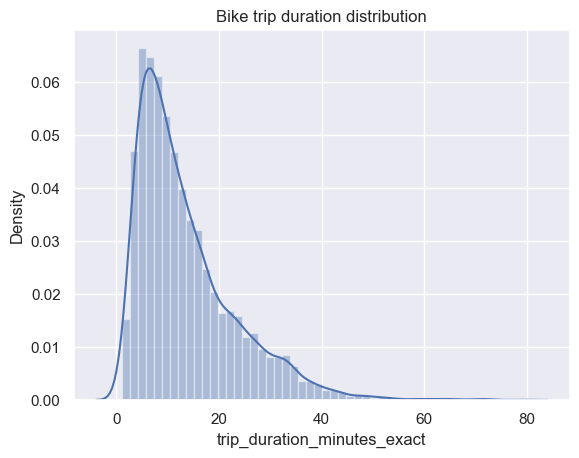

In [91]:
df_4 = df_new[df_new['trip_duration_minutes_exact'] < 80]
sns.distplot(df_4['trip_duration_minutes_exact'])
plt.title('Bike trip duration distribution');

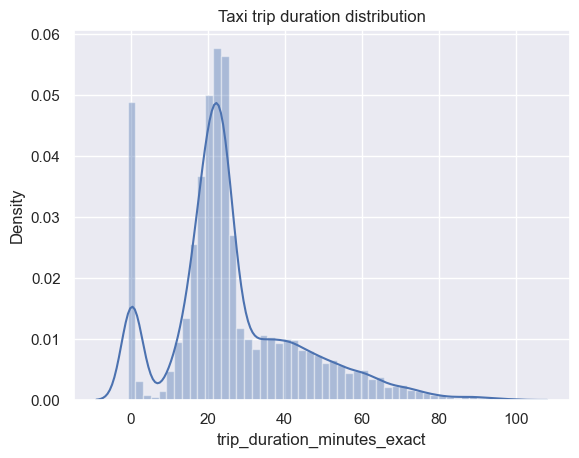

In [92]:
df_3 = df_2[df_2['trip_duration_minutes_exact'] < 100]
sns.distplot(df_3['trip_duration_minutes_exact'])
plt.title('Taxi trip duration distribution');

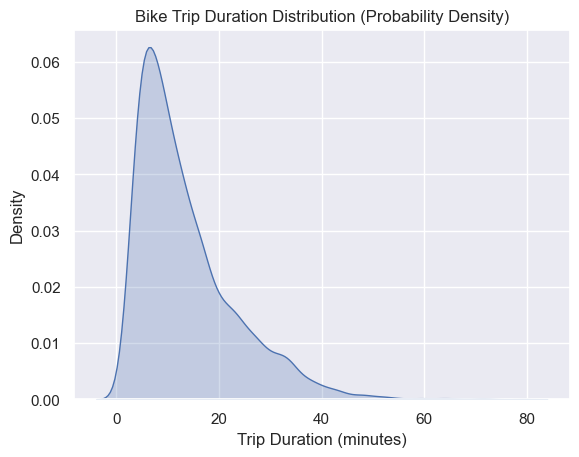

In [117]:
sns.kdeplot(df_4['trip_duration_minutes_exact'], fill=True)
plt.title('Bike Trip Duration Distribution (Probability Density)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Density');


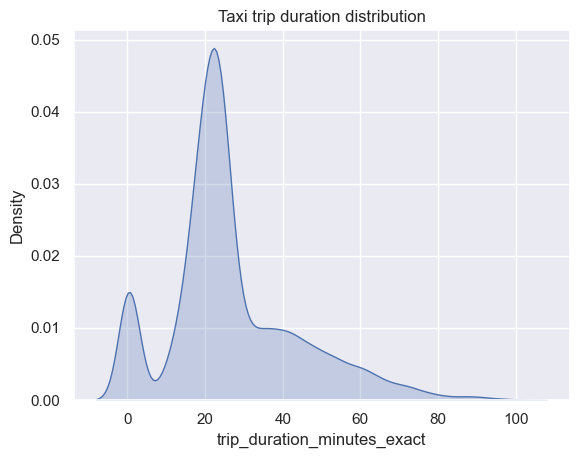

In [118]:
df_3 = df_2[(df_2['trip_duration_minutes_exact'] < 100) & (df_2['trip_duration_minutes_exact'] > 0)]
sns.kdeplot(df_3['trip_duration_minutes_exact'] , fill=True)
plt.title('Taxi trip duration distribution');

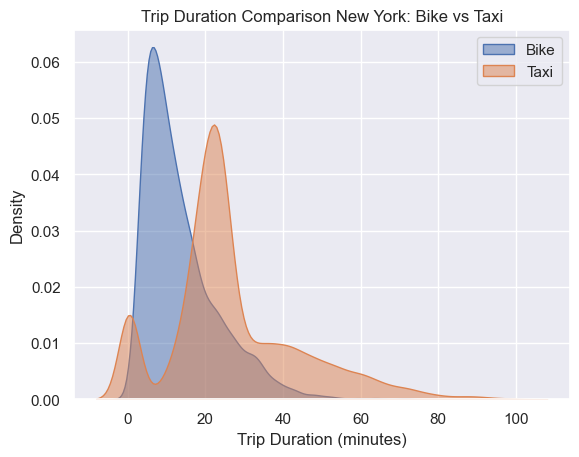

In [119]:
sns.kdeplot(df_4['trip_duration_minutes_exact'], fill=True, label='Bike', alpha=0.5)
sns.kdeplot(df_3['trip_duration_minutes_exact'], fill=True, label='Taxi', alpha=0.5)

plt.title('Trip Duration Comparison New York: Bike vs Taxi')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()